# Project Title : Predicting Protien Classification

# Submitted By :
 
1. Himanshu Kale (22MM62R08)
2. Sohom Basak (22MM62R09)
3. Srijit Set (22MM62R10)

-------------------------------------------------------------------------------------------------------------------------------

# Goal :

The question of whether it is possible to identify a protein's family type based on sequence arises since these proteins have several family types. It would be fascinating to explore if a machine learning strategy can successfully classify a protein's family based on the protein sequence. Notable search engines such as BLAST have this capability.

# Datasets :

We have two datasets viz.
1. id_class.csv

This dataset has the following features:
* structureId
* classification	
* experimentalTechnique	
* macromoleculeType	
* residueCount	
* resolution	
* structureMolecularWeight	
* crystallizationMethod	
* crystallizationTempK	
* densityMatthews	
* densityPercentSol	
* pdbxDetails	
* phValue	
* publicationYear

2. id_seq.csv

This dataset has the following features:
* structureId	
* chainId	
* sequence	
* residueCount	
* macromoleculeType

In [1]:
import pandas as pd
import numpy as np
dataset2 = pd.read_csv('id_class.csv')
dataset1 = pd.read_csv('id_seq.csv')

In [2]:
dataset1

,structureId,chainId,sequence,residueCount,macromoleculeType
0,100D,A,CCGGCGCCGG,20,DNA/RNA Hybrid
1,100D,B,CCGGCGCCGG,20,DNA/RNA Hybrid
2,101D,A,CGCGAATTCGCG,24,DNA
3,101D,B,CGCGAATTCGCG,24,DNA
4,101M,A,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,154,Protein
...,...,...,...,...,...
467299,9XIA,A,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,388,Protein
467300,9XIM,A,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein
467301,9XIM,B,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein
467302,9XIM,C,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,1572,Protein


In [3]:
dataset2

,structureId,classification,experimentalTechnique,macromoleculeType,residueCount,resolution,structureMolecularWeight,crystallizationMethod,crystallizationTempK,densityMatthews,densityPercentSol,pdbxDetails,phValue,publicationYear
0,100D,DNA-RNA HYBRID,X-RAY DIFFRACTION,DNA/RNA Hybrid,20,1.90,6360.30,"VAPOR DIFFUSION, HANGING DROP",NaN,1.78,30.89,"pH 7.00, VAPOR DIFFUSION, HANGING DROP",7.0,1994.0
1,101D,DNA,X-RAY DIFFRACTION,DNA,24,2.25,7939.35,NaN,NaN,2.00,38.45,NaN,NaN,1995.0
2,101M,OXYGEN TRANSPORT,X-RAY DIFFRACTION,Protein,154,2.07,18112.80,NaN,NaN,3.09,60.20,"3.0 M AMMONIUM SULFATE, 20 MM TRIS, 1MM EDTA, ...",9.0,1999.0
3,102D,DNA,X-RAY DIFFRACTION,DNA,24,2.20,7637.17,"VAPOR DIFFUSION, SITTING DROP",277.0,2.28,46.06,"pH 7.00, VAPOR DIFFUSION, SITTING DROP, temper...",7.0,1995.0
4,102L,HYDROLASE(O-GLYCOSYL),X-RAY DIFFRACTION,Protein,165,1.74,18926.61,NaN,NaN,2.75,55.28,NaN,NaN,1993.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
141396,9RUB,LYASE(CARBON-CARBON),X-RAY DIFFRACTION,Protein,932,2.60,101838.68,NaN,NaN,2.38,48.29,NaN,NaN,1991.0
141397,9TNA,T-RNA,X-RAY DIFFRACTION,NaN,0,NaN,24244.34,NaN,NaN,3.17,61.18,NaN,NaN,1986.0
141398,9WGA,LECTIN (AGGLUTININ),X-RAY DIFFRACTION,Protein,342,1.80,34270.22,NaN,NaN,2.50,50.76,NaN,NaN,1990.0
141399,9XIA,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE),X-RAY DIFFRACTION,Protein,388,1.90,43542.29,NaN,NaN,2.79,55.93,NaN,NaN,1989.0


# 1. Data Preprocessing

# 1.1 Extract Protein out of the Dataset

   The goal of the project is to classify the 'proteins' into their family types.But it can be observed that the dataset also contains some macromolecules that are not Proteins these macromolecules are not of the interest of the project.Hence we will try to extract all protein data from the 'dataset1' and 'dataset2' into two new protein dataset viz. 'd1' and 'd2'

In [4]:

d1 = dataset1.loc[dataset1['macromoleculeType']=='Protein']

d1.shape

(345180, 5)

In [5]:
d2 = dataset2.loc[dataset2['macromoleculeType']=='Protein']

d2.shape

(127798, 14)

#  1.2 Extracting only specific feature from the datasets

The goal is to classify the proteins on the basis of the sequence, so other other features in the dataset are not needed. So we will also exclude them from the dataset.

We will now store structureId and sequence from 'd1' into 'data1' and structureId and classification from 'd2' into 'data2'

In [6]:
data1 = d1.loc[:,['structureId','sequence']]

data1.shape

(345180, 2)

In [7]:
data2 = d2.loc[:,['structureId','classification']]

data2.shape

(127798, 2)

# 1.3 Joining the Datasets

It is better if we join the dataset so that we can give a single dataset to the Machine Learing model for training.

In [8]:
df_pre = pd.merge(data1, data2, on='structureId',  how='left')

df_pre

,structureId,sequence,classification
0,101M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,OXYGEN TRANSPORT
1,102L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNAAAKSE...,HYDROLASE(O-GLYCOSYL)
2,102M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,OXYGEN TRANSPORT
3,103L,MNIFEMLRIDEGLRLKIYKDTEGYYTIGIGHLLTKSPSLNSLDAAK...,HYDROLASE(O-GLYCOSYL)
4,103M,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,OXYGEN TRANSPORT
...,...,...,...
346320,9XIA,MNYQPTPEDRFTFGLWTVGWQGRDPFGDATRRALDPVESVQRLAEL...,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE)
346321,9XIM,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE)
346322,9XIM,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE)
346323,9XIM,SVQATREDKFSFGLWTVGWQARDAFGDATRTALDPVEAVHKLAEIG...,ISOMERASE(INTRAMOLECULAR OXIDOREDUCTASE)


# 1.4 Missing Value Handling

As we have joined two dataset there is a possibility of null value occurance at certain places in the dataset so we need to figure it out. If there arises any null value we will discard them an be ready with our dataset

In [9]:
df_pre.isnull().sum()

structureId       0
sequence          3
classification    1
dtype: int64

In [10]:
df_1 = df_pre.dropna()

df_1.shape

(346321, 3)

In [11]:
df = df_1.drop('structureId',axis=1)

df.shape

(346321, 2)

# 1.5 Frequency of occurance of family types 

There are certain family where the frequency of occurance in the dataset is very low , so this might create a nuisance while the model is being trained.So we will set any arbitary buffer of 500 and consider only those types which have occurance of 500 or more in our dataset. Evaluating this we came to a conclusion that our ML model will classify into 61 protein family types.

In [12]:
freq = df.classification.value_counts()
print(freq)

HYDROLASE                            46336
TRANSFERASE                          36424
OXIDOREDUCTASE                       34321
IMMUNE SYSTEM                        15615
LYASE                                11682
                                     ...  
STRUCTURAL PROTEIN, CELL CYCLE           1
KINASE (GLYCOGEN METABOLISM)             1
SURFACE GLYCOPROTEIN                     1
IMMUNE SYSTEM,HYDROLASE INHIBITOR        1
antimicrobial                            1
Name: classification, Length: 4468, dtype: int64


In [13]:
types = np.asarray(freq[(freq > 500)].index)

# Filter dataset's records for classification types > 1000
data = df[df.classification.isin(types)]

print(types)
print(len(types))
print('%d is the number of records in the final filtered dataset' %data.shape[0])

['HYDROLASE' 'TRANSFERASE' 'OXIDOREDUCTASE' 'IMMUNE SYSTEM' 'LYASE'
 'HYDROLASE/HYDROLASE INHIBITOR' 'TRANSCRIPTION' 'VIRAL PROTEIN'
 'TRANSPORT PROTEIN' 'VIRUS' 'SIGNALING PROTEIN' 'ISOMERASE' 'LIGASE'
 'MEMBRANE PROTEIN' 'PROTEIN BINDING' 'STRUCTURAL PROTEIN' 'CHAPERONE'
 'STRUCTURAL GENOMICS, UNKNOWN FUNCTION' 'SUGAR BINDING PROTEIN'
 'DNA BINDING PROTEIN' 'PHOTOSYNTHESIS' 'ELECTRON TRANSPORT'
 'TRANSFERASE/TRANSFERASE INHIBITOR' 'METAL BINDING PROTEIN'
 'CELL ADHESION' 'UNKNOWN FUNCTION' 'PROTEIN TRANSPORT' 'TOXIN'
 'CELL CYCLE' 'RNA BINDING PROTEIN' 'DE NOVO PROTEIN' 'HORMONE'
 'GENE REGULATION' 'OXIDOREDUCTASE/OXIDOREDUCTASE INHIBITOR' 'APOPTOSIS'
 'MOTOR PROTEIN' 'PROTEIN FIBRIL' 'METAL TRANSPORT'
 'VIRAL PROTEIN/IMMUNE SYSTEM' 'CONTRACTILE PROTEIN' 'FLUORESCENT PROTEIN'
 'TRANSLATION' 'BIOSYNTHETIC PROTEIN' 'OXYGEN TRANSPORT'
 'structural genomics, unknown function' 'LIPID BINDING PROTEIN'
 'CYTOKINE' 'VIRUS LIKE PARTICLE' 'hydrolase/hydrolase inhibitor'
 'TRANSCRIPTION REGULAT

In [14]:
data

,sequence,classification
0,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,OXYGEN TRANSPORT
2,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,OXYGEN TRANSPORT
4,MVLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDR...,OXYGEN TRANSPORT
7,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,OXYGEN TRANSPORT
8,VLSEGEWQLVLHVWAKVEADVAGHGQDILIRLFKSHPETLEKFDRF...,OXYGEN TRANSPORT
...,...,...
346302,ANIVGGIEYSINNASLCSVGFSVTRGATKGFVTAGHCGTVNATARI...,HYDROLASE/HYDROLASE INHIBITOR
346303,XAAPL,HYDROLASE/HYDROLASE INHIBITOR
346306,SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYD...,OXIDOREDUCTASE
346307,SRAPAPATPHAPDHSPAPNSPTLTRPPEGPKFPRVKNWELGSITYD...,OXIDOREDUCTASE


# 2. Converting sequence character into numbers

We will use countvectorizer from scikit learn for this task.

To get contextual information from the sequence of the protein we will use n_gram but the question arises of what dimension to use. So we will check the dimensionality that the countvectorizer returns and plot it on a bar plot

In [24]:
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

dim = []
for i in range(1,5):
    vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (i,i))
    vect.fit(data['sequence'])
    df_new = vect.transform(data['sequence'])
    
    dim.append(df_new.shape[1])
    
print(dim)

[26, 563, 9993, 175744]


In [25]:
ngram = ['n_gram(1,1)','n_gram(2,2)','n_gram(3,3)','n_gram(4,4)']
ngram

['n_gram(1,1)', 'n_gram(2,2)', 'n_gram(3,3)', 'n_gram(4,4)']

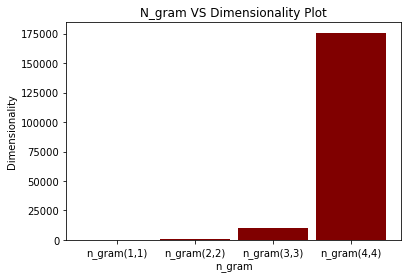

In [29]:
plt.bar(ngram,dim, color ='maroon',
        width = 0.9)
 
plt.xlabel("n_gram")
plt.ylabel("Dimensionality")
plt.title("N_gram VS Dimensionality Plot")
plt.show()

From the plot it can be observed that :
* As we go on increasing the i value the dimensionality increases.
* If we select n_gram(1,1) or n_gram(2,2) the dimensionality would be small but the contextual information would be missing.
* If we select n_gram(4,4) then the dimensionality would be very high and would led to Curse of Dimensionality

So as an optimal consideration we will be selecting n_gram(3,3)

#  3. Splitting of Data for Training and Testing

In [16]:
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import CountVectorizer

X_train, X_test,y_train,y_test = train_test_split(data['sequence'], data['classification'], test_size = 0.3, random_state = 1)

vect = CountVectorizer(analyzer = 'char_wb', ngram_range = (3,3))

vect.fit(X_train)
X_train_df = vect.transform(X_train)
X_test_df = vect.transform(X_test)

# 4. Machine Learning Model

# 4.1 K-Nearest Neighbors Model



In [19]:
prediction = dict()

from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.neighbors import KNeighborsClassifier
neigh = KNeighborsClassifier(n_neighbors=3)

neigh.fit(X_train_df,y_train)

pred = neigh.predict(X_test_df)

prediction["KNeighborsClassifier"] = accuracy_score(pred,y_test)
print( prediction['KNeighborsClassifier'])

0.8095232647270814


In [21]:
print('Accuracy of KNN Model is =',prediction['KNeighborsClassifier']*100,'%')

Accuracy of KNN Model is = 80.95232647270814 %


# 4.1.1 Plotting the confusion matrix for the Model 

<AxesSubplot:>

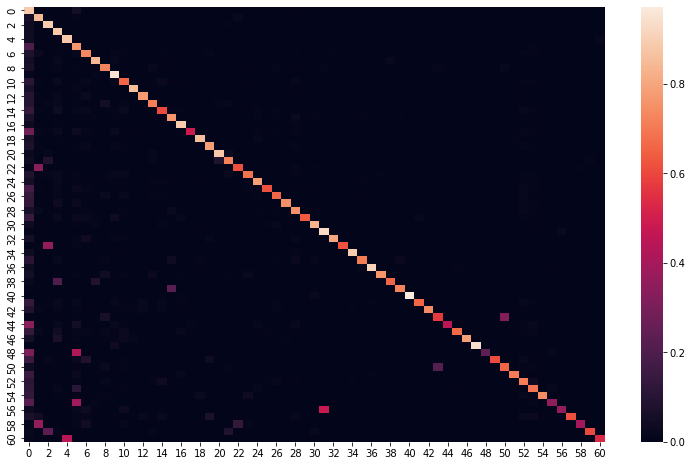

In [29]:
# Plotting the Confusion Matrix for the KNN Model
# Plot confusion matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, pred, labels = types)

# #Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

# 4.1.2 Displaying the Classification Report with different metrics

In [30]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

                                         precision    recall  f1-score   support

                  ANTIMICROBIAL PROTEIN       0.57      0.74      0.64       182
                              APOPTOSIS       0.68      0.89      0.77       422
                   BIOSYNTHETIC PROTEIN       0.86      0.74      0.79       276
                         BLOOD CLOTTING       0.25      0.69      0.36       183
                          CELL ADHESION       0.71      0.78      0.74       906
                             CELL CYCLE       0.53      0.75      0.62       708
                              CHAPERONE       0.87      0.89      0.88      1203
                    CONTRACTILE PROTEIN       0.86      0.72      0.78       361
                               CYTOKINE       0.87      0.79      0.83       256
                        DE NOVO PROTEIN       0.66      0.83      0.74       499
                    DNA BINDING PROTEIN       0.85      0.78      0.81       959
                     ELECTR

# 4.2 Naive Bayes Model



In [45]:
# Naive Bayes

from sklearn.naive_bayes import MultinomialNB

m = MultinomialNB()
m.fit(X_train_df, y_train)
pred = m.predict(X_test_df)
prediction["MultinomialNB"] = accuracy_score(pred, y_test)
print( 'Accuracy of Naive Bayes Model is = ',prediction['MultinomialNB']*100,'%')

Accuracy of Naive Bayes Model is =  53.136476483576836 %


# 4.2.1 Plotting the confusion matrix for the Model

<AxesSubplot:>

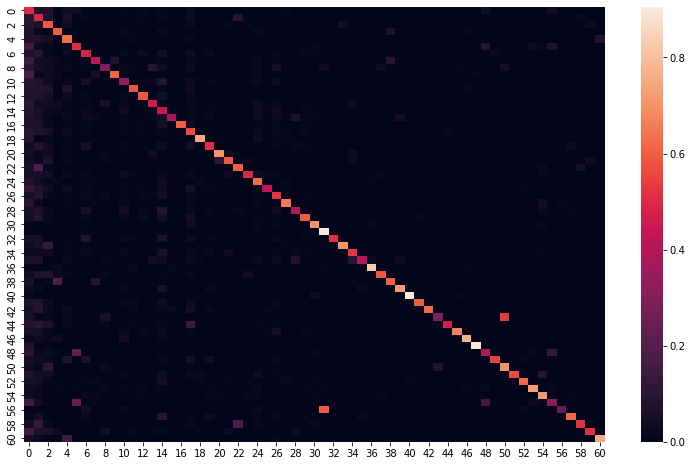

In [46]:
# Plotting the Confusion Matrix for the NB Model
# Plot confusion matrix
import seaborn as sns
conf_mat = confusion_matrix(y_test, pred, labels = types)

# #Normalize confusion_matrix
conf_mat = conf_mat.astype('float')/ conf_mat.sum(axis=1)[:, np.newaxis]

# Plot Heat Map
fig , ax = plt.subplots()
fig.set_size_inches(13, 8)
sns.heatmap(conf_mat)

# 4.2.2 Displaying the Classification Report with different metrics

In [47]:
from sklearn import metrics
print(metrics.classification_report(y_test, pred))

                                         precision    recall  f1-score   support

                  ANTIMICROBIAL PROTEIN       0.26      0.71      0.39       182
                              APOPTOSIS       0.39      0.53      0.45       422
                   BIOSYNTHETIC PROTEIN       0.54      0.62      0.58       276
                         BLOOD CLOTTING       0.33      0.72      0.46       183
                          CELL ADHESION       0.35      0.63      0.45       906
                             CELL CYCLE       0.46      0.40      0.43       708
                              CHAPERONE       0.85      0.60      0.71      1203
                    CONTRACTILE PROTEIN       0.70      0.72      0.71       361
                               CYTOKINE       0.55      0.77      0.65       256
                        DE NOVO PROTEIN       0.54      0.70      0.61       499
                    DNA BINDING PROTEIN       0.50      0.50      0.50       959
                     ELECTR

# 5. Comparing the Models

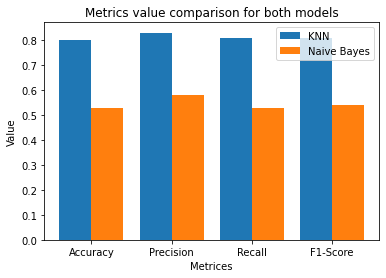

In [49]:
knn = [0.80,0.83,0.81,0.81]
nb = [0.53,0.58,0.53,0.54]

# Comparing the Results of the two models
index = np.arange(4)
bar_width = 0.4

fig, axis = plt.subplots()
K_NN = axis.bar(index, knn, bar_width,
                label="KNN")

N_B = axis.bar(index+bar_width, nb,
                 bar_width, label="Naive Bayes")

axis.set_xlabel('Metrices')
axis.set_ylabel('Value')
axis.set_title('Metrics value comparison for both models')
axis.set_xticks(index + bar_width / 2)
axis.set_xticklabels(["Accuracy", "Precision", "Recall", "F1-Score"])
axis.legend()

plt.show()

